In [ ]:
library(Seurat)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(MetBrewer)
library(harmony)

In [ ]:
# Read in the harmonized iGlut pre and post
seurat <- readRDS('iGlut_all_seurat_harmony.rds')


In [ ]:
# Read in lists of neural maturation genes
library(readxl)
list1 <- read_excel("neural_differentiation.xlsx", col_names = FALSE)
list2 <- read_excel("neural_projection.xlsx", col_names = FALSE)
list3 <- read_excel("synapse_assembly.xlsx", col_names = FALSE)
list4 <- read_excel("neurotransmitter_secretion.xlsx", col_names = FALSE)

# pull out genes of the list
go1 <- list1[[1]]
go2 <- list2[[1]]
go3 <- list3[[1]]
go4 <- list4[[1]]

# Keep only the genes that exist in seurat
go1 <- go1[go1 %in% rownames(seurat)]
go2 <- go2[go2 %in% rownames(seurat)]
go3 <- go3[go3 %in% rownames(seurat)]
go4 <- go4[go4 %in% rownames(seurat)]

In [15]:
# Calculate neural maturation scores
seurat[['GO_nd']] <- PercentageFeatureSet(seurat, features = go1)
seurat[['GO_np']] <- PercentageFeatureSet(seurat, features = go2)
seurat[['GO_syn']] <- PercentageFeatureSet(seurat, features = go3)
seurat[['GO_nt']] <- PercentageFeatureSet(seurat, features = go4)


In [34]:
col_basal_media <- c('#cccccc','#4c825d','#8dc7dc','#0e2a4d')

In [56]:
# Subsetting only foro GLUT and CHO
df <- seurat@meta.data %>% filter(neuron_type %in% c('GLUT', 'CHO'))


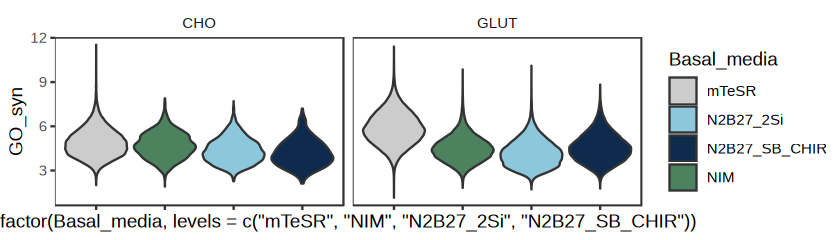

In [ ]:
options(repr.plot.width=7, repr.plot.height=2)
ggplot(df, aes(x = factor(Basal_media, levels=c('mTeSR','NIM','N2B27_2Si','N2B27_SB_CHIR')),  
                             y = GO_syn, fill=Basal_media)) +
    geom_violin(scale='width') +
    theme_bw() +
    facet_grid(~ neuron_type) +
    ggpubr::rotate_x_text() +
    scale_fill_manual(values = col_basal_media) +
    theme(axis.text.x=element_blank()) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())

# Save the plot to a file (e.g., PNG format)
dir <- 'GO_syn_bm_neuron.pdf'
ggsave(dir, width = 12, height = 4, dpi = 300, units = "cm")


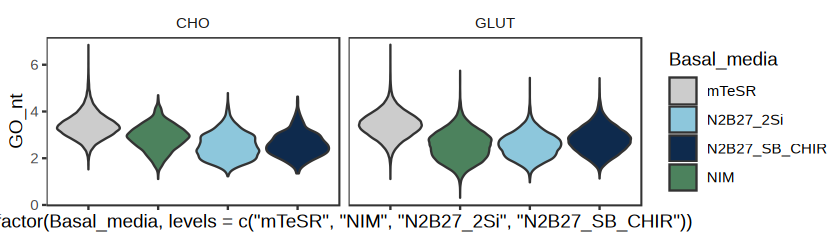

In [ ]:
options(repr.plot.width=7, repr.plot.height=2)
ggplot(df, aes(x = factor(Basal_media, levels=c('mTeSR','NIM','N2B27_2Si','N2B27_SB_CHIR')),  
                             y = GO_nt, fill=Basal_media)) +
    geom_violin(scale='width') +
    theme_bw() +
    facet_grid(~ neuron_type) +
    ggpubr::rotate_x_text() +
    scale_fill_manual(values = col_basal_media) +
    theme(axis.text.x=element_blank()) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())

# Save the plot to a file (e.g., PNG format)
dir <- 'GO_nt_bm_neuron.pdf'
ggsave(dir, width = 12, height = 4, dpi = 300, units = "cm")
